# Проект: Обучение с учителем: качество модели

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. 

Необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

Предоставлены данные в табличной форме. 

+ `market_file.csv` - содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

    + `id` — номер покупателя в корпоративной базе данных.
    + `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
    + `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
    + `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
    + `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
    + `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
    + `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
    + `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
    + `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
    + `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца. Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
    + `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
    + `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

+ `market_money.csv` - с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

    + `id` — номер покупателя в корпоративной базе данных.
    + `Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
    + `Выручка` — сумма выручки за период.

+ `market_time.csv` - с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

    + `id` — номер покупателя в корпоративной базе данных.
    + `Период` — название периода, во время которого зафиксировано общее время.
    + `минут` — значение времени, проведённого на сайте, в минутах.

+ `money.csv` - с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

    + `id` — номер покупателя в корпоративной базе данных.
    + `Прибыль` — значение прибыли.


Разобъем задачу на два этапа:

1. Разработаем модель, которая предскажет вероятность снижения покупательской активности.
2. Выделим сегмент покупателей, проанализируем его и предложим, как увеличить его покупательскую активность, используя данные моделирования, данные о прибыли покупателей и исходные данные (если понадобятся). Возможные сегменты:
+ Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности.
+ Группа клиентов, которые покупают только технику, то есть товары с длинным жизненным циклом.
+ Группа клиентов, которые покупают товары из категории «Товары для себя» (новая категория, которую можно выделить на основе текущих) или «Товары для детей».
+ Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Объединение-таблиц" data-toc-modified-id="Объединение-таблиц-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Объединение таблиц</a></span></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Корреляционный анализ</a></span></li><li><span><a href="#Использование-пайплайнов" data-toc-modified-id="Использование-пайплайнов-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Использование пайплайнов</a></span></li><li><span><a href="#Анализ-важности-признаков" data-toc-modified-id="Анализ-важности-признаков-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Анализ важности признаков</a></span></li><li><span><a href="#Сегментация-покупателей" data-toc-modified-id="Сегментация-покупателей-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Сегментация покупателей</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Загрузка данных

Установка пакетов

In [1]:
!pip install matplotlib==3.3.4 seaborn==0.11.0 -q
!pip install phik -q
!pip install shap -q
!pip install --upgrade scikit-learn==1.3.0 -q

Импорт библиотек

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas  as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import phik
import seaborn as sns
import shap
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


from phik import phik_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import (train_test_split, 
                                     GridSearchCV, 
                                     RandomizedSearchCV
                                    )
# импортируем классы
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             precision_score,
                             recall_score,
                             roc_auc_score
                            )
from sklearn.inspection import permutation_importance
# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer
# загружаем класс pipeline
from sklearn.pipeline import Pipeline
# загружаем классы для подготовки данных
from sklearn.preprocessing import (MinMaxScaler,
                                   OneHotEncoder, 
                                   OrdinalEncoder, 
                                   RobustScaler,
                                   StandardScaler
                                  )
# загружаем нужные модели
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [3]:
#Константы
RANDOM_STATE = 42
TEST_SIZE = 0.25

Загрузка данных

In [4]:
# Загружаем датасеты
try:
    market_file = pd.read_csv('/datasets/market_file.csv')
    market_money = pd.read_csv('/datasets/market_money.csv')
    market_time = pd.read_csv('/datasets/market_time.csv')
    money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')
except:
    market_file = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv')
    market_money = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv')
    market_time = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv')
    money = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv')

In [5]:
# Функция для получения общей информации о датасете
def get_info(data):
    display(data.head())
    print('')
    display(data.info())
    print('')
    display(data.describe().T)
    print('')
    print('Количество явных дубликатов:', data.duplicated().sum())
    print('Количество пропусков:\n', data.isna().sum())

In [6]:
get_info(market_file)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса               

None

,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.0,215672.75,215997.50,216322.25,216647.00
Маркет_актив_6_мес,1300.0,4.253769,1.014814,0.9,3.70,4.20,4.90,6.60
Маркет_актив_тек_мес,1300.0,4.011538,0.696868,3.0,4.00,4.00,4.00,5.00
Длительность,1300.0,601.898462,249.856289,110.0,405.50,606.00,806.00,1079.00
Акционные_покупки,1300.0,0.319808,0.249843,0.0,0.17,0.24,0.30,0.99
Средний_просмотр_категорий_за_визит,1300.0,3.270000,1.355350,1.0,2.00,3.00,4.00,6.00
Неоплаченные_продукты_штук_квартал,1300.0,2.840000,1.971451,0.0,1.00,3.00,4.00,10.00
Ошибка_сервиса,1300.0,4.185385,1.955298,0.0,3.00,4.00,6.00,9.00
Страниц_за_визит,1300.0,8.176923,3.978126,1.0,5.00,8.00,11.00,20.00



Количество явных дубликатов: 0
Количество пропусков:
 id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64


In [7]:
get_info(market_money)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

,count,mean,std,min,25%,50%,75%,max
id,3900.0,215997.500000,375.325686,215348.0,215672.75,215997.5,216322.25,216647.0
Выручка,3900.0,5025.696051,1777.704104,0.0,4590.15,4957.5,5363.00,106862.2



Количество явных дубликатов: 0
Количество пропусков:
 id         0
Период     0
Выручка    0
dtype: int64


In [8]:
market_money.query('id == 215380')

,id,Период,Выручка
96,215380,препредыдущий_месяц,5051.0
97,215380,предыдущий_месяц,6077.0
98,215380,текущий_месяц,106862.2


In [9]:
get_info(market_time)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

,count,mean,std,min,25%,50%,75%,max
id,2600.0,215997.500000,375.349754,215348.0,215672.75,215997.5,216322.25,216647.0
минут,2600.0,13.336154,4.080198,4.0,10.00,13.0,16.00,23.0



Количество явных дубликатов: 0
Количество пропусков:
 id        0
Период    0
минут     0
dtype: int64


In [10]:
get_info(money)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.00,215672.75,215997.500,216322.25,216647.00
Прибыль,1300.0,3.996631,1.013722,0.86,3.30,4.045,4.67,7.43



Количество явных дубликатов: 0
Количество пропусков:
 id         0
Прибыль    0
dtype: int64


**Вывод**
+ В таблицах отсутствуют пропуски - количество значений в столбцах соответствует количеству строк;
+ Типы данных в каждом стоблце во всех таблицах соответсвуют действительности;
+ Названия стоблцов необходимо привести к нижнему регистру и можно сократить, не теряя смысла названия столбца;
+ НПропущенных значений и явных дубликатов не выявлено.

##  Предобработка данных

Проверка на наличие неявных дубликатов, неявных пропусков.

In [11]:
dataset_names = ['market_file', 'market_money', 'market_time', 'money']
dataset_dict = [market_file, market_money, market_time, money]

for name, dataframe in zip(dataset_names, dataset_dict):
    str_columns = dataframe.select_dtypes(include='object').columns.tolist() 
    print(f'Датасет {name}\n')
    for col in str_columns:
        print(f'\t{col}')
        print(f'\t{dataframe[col].unique()}\n')

Датасет market_file

	Покупательская активность
	['Снизилась' 'Прежний уровень']

	Тип сервиса
	['премиум' 'стандартт' 'стандарт']

	Разрешить сообщать
	['да' 'нет']

	Популярная_категория
	['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']

Датасет market_money

	Период
	['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']

Датасет market_time

	Период
	['текущий_месяц' 'предыдцщий_месяц']

Датасет money



- в наборе `market_file` в признаке `Тип сервиса` значения 'стандартт' и 'стандарт' неявно дублируются
- в наборе `market_time` в признаке `Период` значение 'предыдцщий_месяц' указано некоректно
- отсутствуют неявные пропуски (значения вида 'nan', пустые строки и т.п.)

Предобработка `market_file`

In [12]:
# Изменение названий столбцов
market_file.columns = map(str.lower, market_file.columns)
market_file.columns = market_file.columns.str.replace(' ', '_')
# Исправление данных
market_file.тип_сервиса = market_file.тип_сервиса.replace(['стандартт'],'стандарт')
print('Явных дубликатов:', market_file.duplicated().sum(), '\n')
market_file.info()

Явных дубликатов: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_с

Предобработка  `market_money`

In [13]:
# Изменение названий столбцов
market_money.columns = map(str.lower, market_money.columns)
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


Предобработка `market_time`

In [14]:
# Изменение названий столбцов
market_time.columns = map(str.lower, market_time.columns)
# Исправление данных
market_time.период = market_time.период.replace(['предыдцщий_месяц'],'предыдущий_месяц')
print('Явных дубликатов:', market_time.duplicated().sum(), '\n')
market_time.info()

Явных дубликатов: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


Предобработка `money`

In [15]:
money.columns = map(str.lower, money.columns)
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


**Вывод**

В представленных данных пропуски не обнаружены

Произведено изменение названий столбцов:
+ перевод в строчный формат
+ замена пробелов на подчеркивание

В `market_file` 
+ в колонке `тип_сервиса` данные `стандартт` заменены на `стандарт`

В `market_money`
+ в колонке `период`данные `препредыдущий_месяц` заменены на `предыдущий_месяц`

В `market_time`
+ в колонке `период` данные `предыдцщий_месяц` заменены на `предыдущий_месяц`

##  Исследовательский анализ данных

**Количественные признаки**

In [16]:
def hist_box(data, column):
    plt.figure(figsize=(15, 5))
    
    # Количество интервалов (bins) будет рассчитано как квадратный корень из числа наблюдений
    num_bins = int(np.sqrt(len(data[column])))
    
    # Гистограмма
    plt.subplot(1, 2, 1)
    plt.xlabel(f'Значения столбца "{column}"')
    plt.ylabel('Частота')
    plt.title(f'Гистограмма для "{column}"')
    sns.histplot(data[column], bins=num_bins)  # Используем количество интервалов num_bins

    # Диаграмма размаха
    plt.subplot(1, 2, 2)
    plt.xlabel(f'Значения столбца "{column}"')
    plt.title(f'Диаграмма размаха для "{column}"')
    sns.boxplot(x=data[column])
    
    plt.tight_layout()
    plt.show()

In [17]:
def subplot(data, column):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 2)
    plt.title(f'Столбчатая диаграмма для {column}')
    sns.countplot(data=data, x=column, palette='viridis')
    plt.xlabel(f'{column}')
    plt.ylabel('Частота')
    plt.tight_layout()
    plt.show()

In [18]:
#создание списка количественных столбцов датасета market_file
num_col_market = ['маркет_актив_6_мес', 
                  'длительность', 
                  'акционные_покупки']

#создание списка дискретных столбцов датасета market_file
discret_col_market = ['маркет_актив_тек_мес',
                     'средний_просмотр_категорий_за_визит',
                     'неоплаченные_продукты_штук_квартал', 
                     'ошибка_сервиса', 
                     'страниц_за_визит']

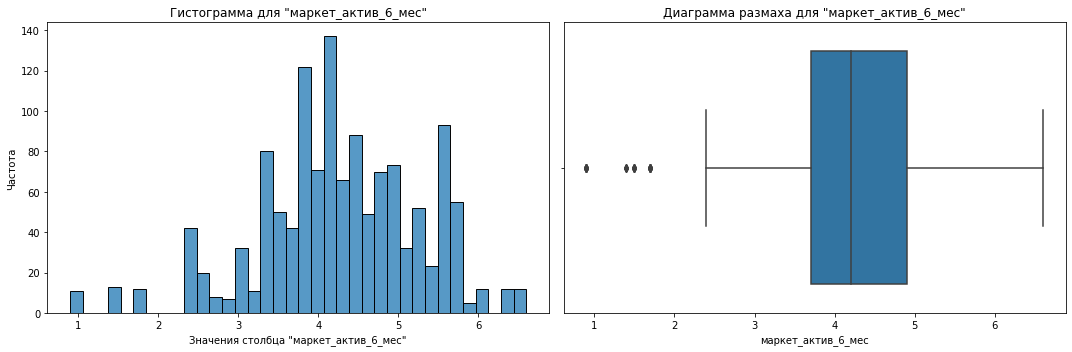

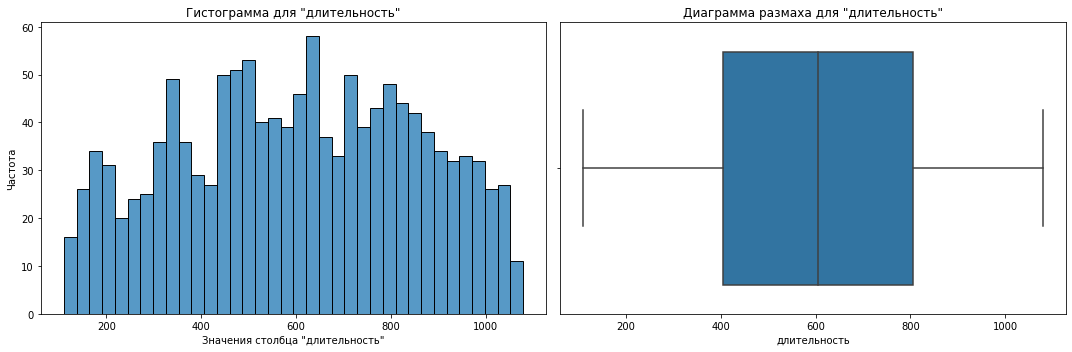

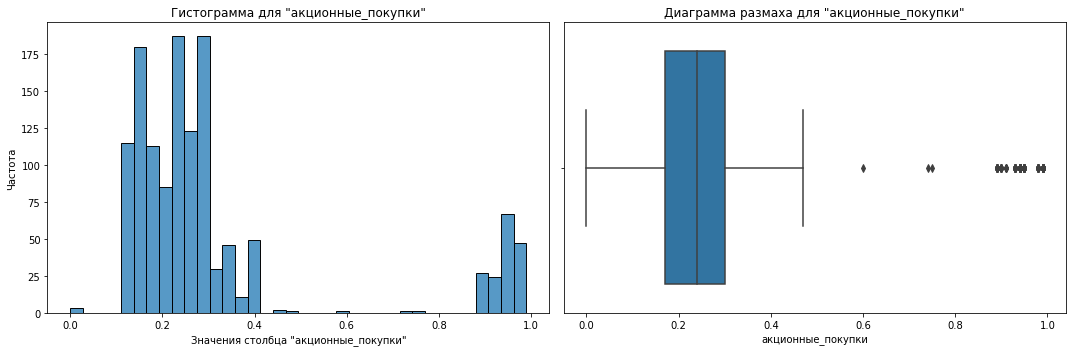

In [19]:
for name in num_col_market:
    hist_box(market_file, name)

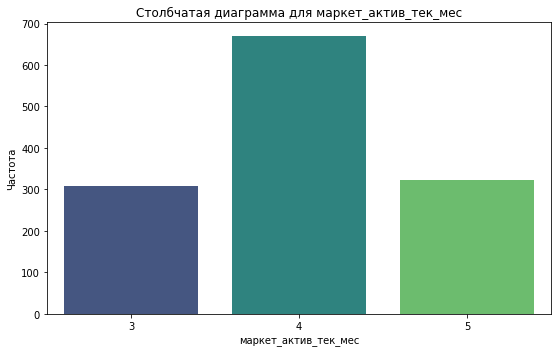

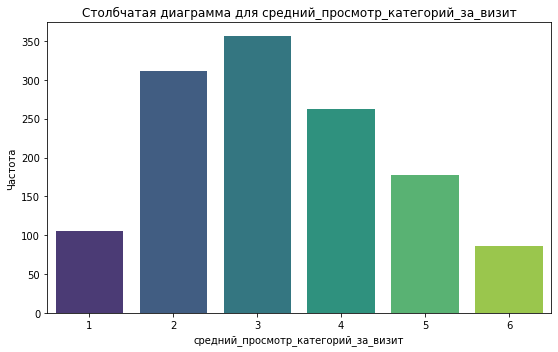

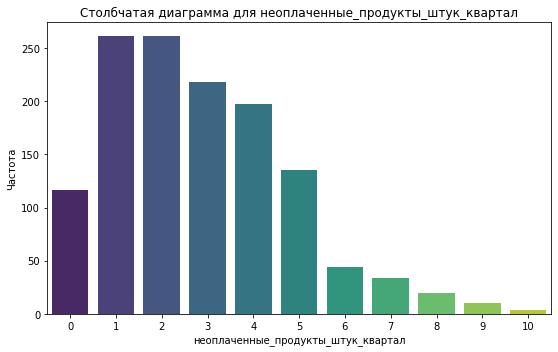

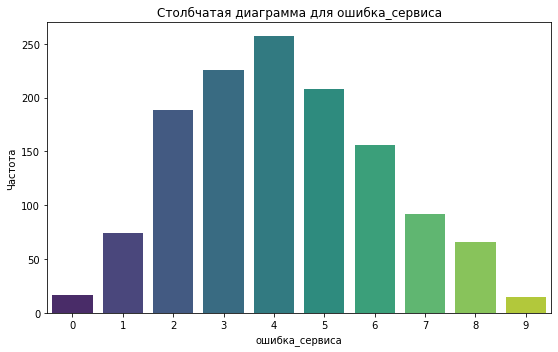

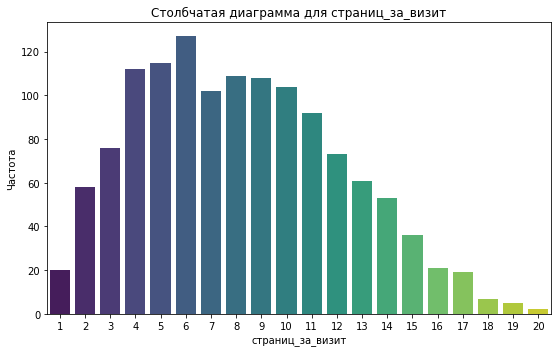

In [20]:
#построение распределений дискретных признаков датасета market_file
for name in discret_col_market:
    subplot(market_file, name)

- признак `маркет_актив_6_мес` в целом распределен нормально, есть несколько слишком малых значений. Надо иметь это ввиду, возможно придется их удалить;
- признак `маркет_актив_тек_мес` можно сделать категориальным признаком с 3-мя категориями;
- признак `длительность` в целом распределен равномерно на всём диапазоне значений;
- признак `акционные_покупки` имеет бимодальное распределение - в области 0,2 и в области близкой к 1. Есть немалая доля покупателей, кто покупает только по акции! К ним нужно присмотреться повнимательней;
- признак `средний_просмотр_категорий_за_визит` имеет нормальное распределение, можно сделать категориальным признаком с 6 категориями;
- признак `неоплаченные_продукты_штук_квартал` имеет слегка скорешенное влево распределение - редко кто хранит в корзине больше 8 предметов - будет категориальным признаком с 11 категориями;
- признак `ошибка_сервиса` распределен нормально - будет категориальным признаком с 10 категориями;
- признак `страниц_за_визит` имеет слегка скошенное влево нормальное распределение.

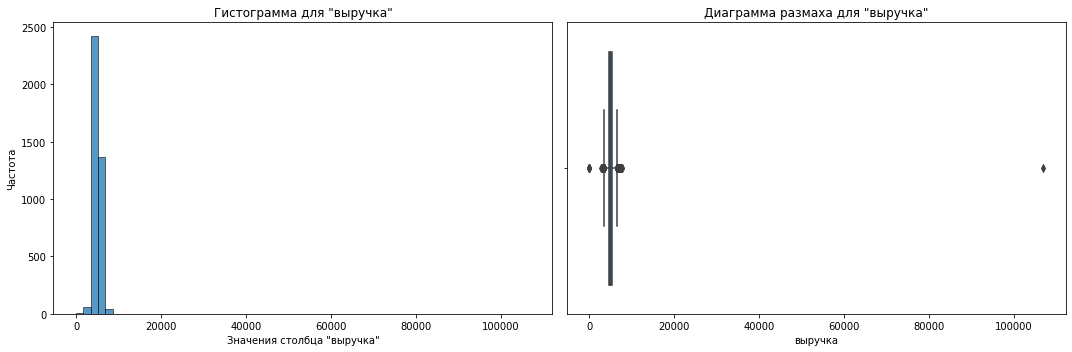

In [21]:
#создание списка количественных столбцов датасета market_money
num_col_market_money = ['выручка'] 
#построение распределений количественных признаков датасета  market_money
for name in num_col_market_money:
    hist_box(market_money, name)

In [22]:
#нахождение выбросов
market_money.query('выручка > 20000')

,id,период,выручка
98,215380,текущий_месяц,106862.2


Имеется одно аномально большое значение выручки. Это выручка за текущий месяц (который, как я полагаю, еще не закончился). Стоит это значение убрать. А также убрать данного пользователя из всех датасетов.

In [23]:
#удаление аномально большого значения выручки
market_money = market_money.query('id != 215380')

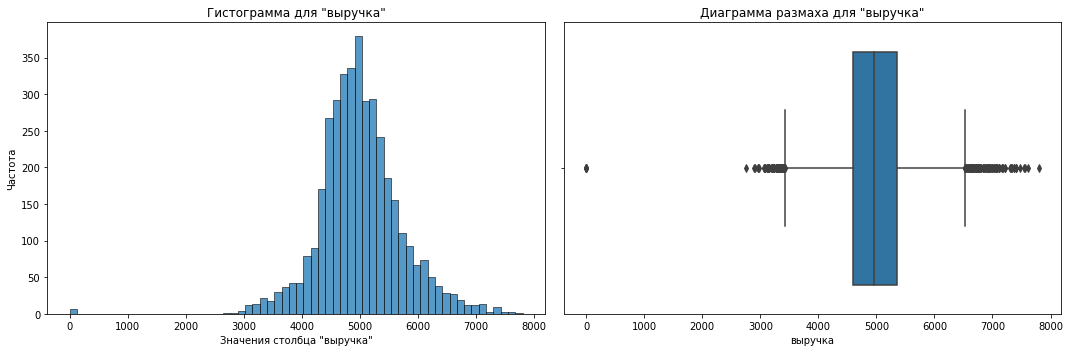

In [24]:
#построение распределений количественных признаков датасета  market_money
for name in num_col_market_money:
    hist_box(market_money, name)

Признак `выручка` распределен нормально, также имеются нулевые значения - это пользователи, которые не совершали покупок в указанные периоды. От них тоже придется "избавиться".

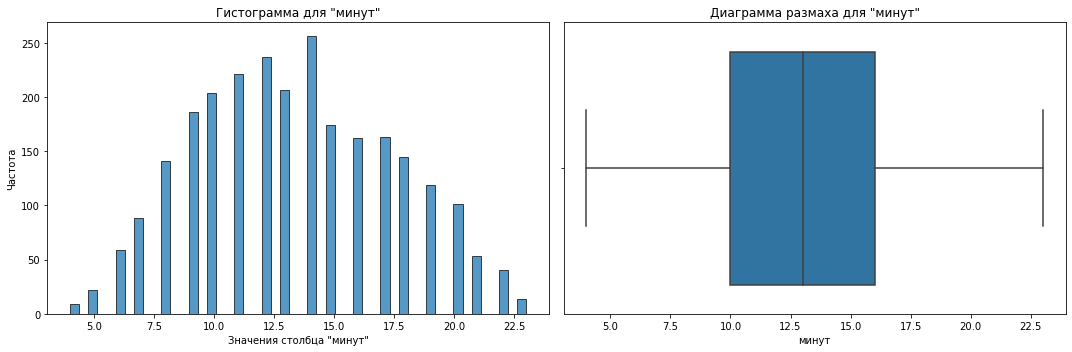

In [25]:
#создание списка количественных столбцов датасета market_time
num_col_time = ['минут'] 
#построение распределений количественных признаков датасета market_time
for name in num_col_time:
    hist_box(market_time, name)

Признак `минуты` распределен нормально.

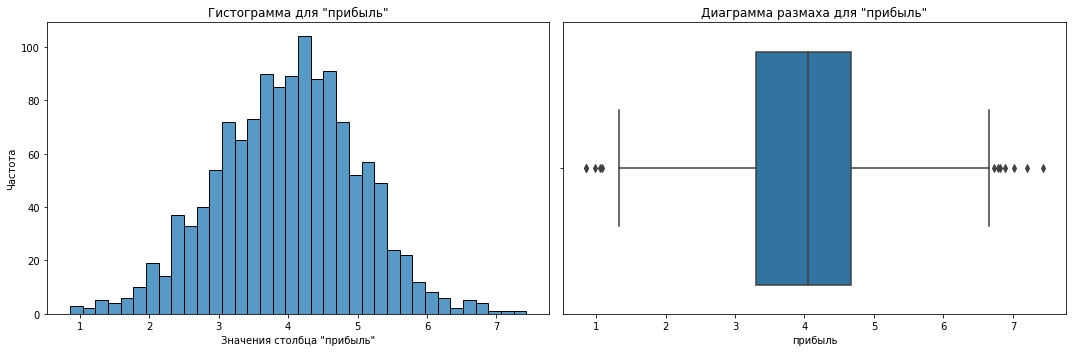

In [26]:
#создание списка количественных столбцов датасета money
num_col_money = ['прибыль'] 
for name in num_col_money:
    hist_box(money, name)

Признак `прибыль` распределен нормально.

**Категориальные признаки**

In [27]:
#создание функции для построения круговой диаграммы для категориальных признаков
def pie_graph(dataset, column, name, n, i):
    plt.subplot(1, n, i)
    plt.title(column)
    plt.pie(x=dataset.groupby(column)[name].count(),
            startangle=90,
            labeldistance=1.1, 
            wedgeprops={'linewidth':3, 'edgecolor':'white'}, 
            autopct='%1.1f%%',
            labels=dataset.groupby(column)[name].count().index)

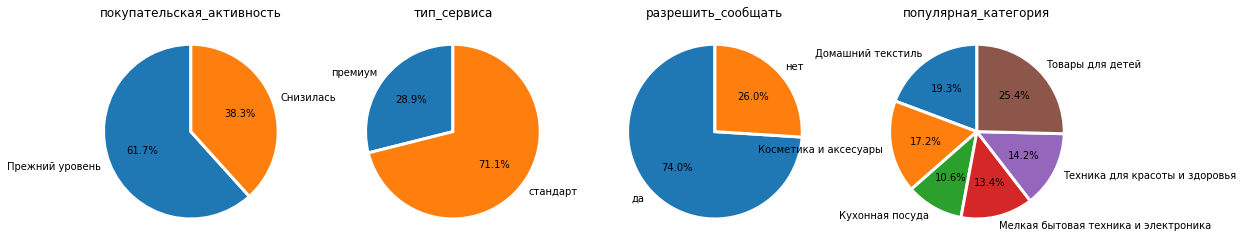

In [28]:
#создание списка категориальных признаков датасета market_file
cat_col_market = ['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать', 'популярная_категория']
#круговые диаграммы для датасета market_file
i = 1
plt.figure(figsize=(18,7))
for name in cat_col_market:
    pie_graph(market_file, name, 'id', len(cat_col_market), i)
    i += 1

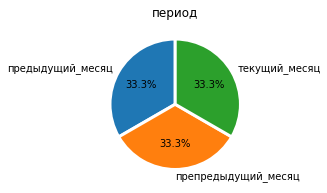

In [29]:
#создание списка категориальных признаков датасета market_money
cat_col_m_money = ['период']
#круговые диаграммы для датасета m_money
i = 1
plt.figure(figsize=(18,3))
for name in cat_col_m_money:
    pie_graph(market_money, name, 'id', len(cat_col_m_money), i)
    i += 1

Признак `период` распределен равномерно

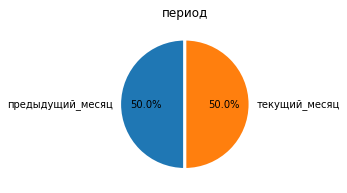

In [30]:
#создание списка категориальных признаков датасета market_time
cat_col_time = ['период']
#круговые диаграммы для датасета market_time
i = 1
plt.figure(figsize=(18,3))
for name in cat_col_time:
    pie_graph(market_time, name, 'id',len(cat_col_time), i)
    i += 1

Признак `период` распределен равномерно

**Выбор покупателей, активных в последние 3 месяца**

In [31]:
#выбор пользователей, не принесших выручку в течение последних 3 месяцов
market_money.query('выручка == 0')

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


Пользователей, которые проявляли активность в течение менее 3-х месяцев, всего трое. Их нужно убрать из датасетов.

In [32]:
id_clients = market_money.loc[market_money['выручка'] == 0, 'id'].unique()
money = money[~money['id'].isin(id_clients)]
market_money = market_money.loc[~market_money['id'].isin(id_clients), :]
market_file = market_file.loc[~market_file['id'].isin(id_clients), :]
market_time = market_time.loc[~market_time['id'].isin(id_clients), :]

**Вывод**

- Представленные данные в своем большинстве распределены нормально. Обнаружены выбросы в большинстве данных.

- Столбцы `период` в `market_money` и `market_time` являются разными по своей значимости, но названия одинаковые, это необходимо учитывать при объединении таблиц.

- Удалены 3 пользователя, которые проявляли активность в течение менее 3-х месяцев.

## Объединение таблиц

Объединеним датасеты `market_file`, `market_money` и `market_time`

In [33]:
market_money_grouped = market_money.pivot_table(index=['id'], columns=["период"])
market_money_grouped.columns = ['выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']
market_money_grouped['id'] = market_money_grouped.index

market_time_grouped = market_time.pivot_table(index=['id'], columns=["период"])
market_time_grouped.columns = ['минут_предыдущий_месяц', 'минут_текущий_месяц']
market_time_grouped['id'] = market_time_grouped.index

market_full = market_file.join(market_money_grouped, on='id', lsuffix="_left", rsuffix="_выручка")
market_full = market_full.rename(columns={'id_left':'id'})
market_full = market_full.join(market_time_grouped, on='id', lsuffix="_left", rsuffix="_минут")
market_full = market_full.rename(columns={'id_left':'id'})
market_full = market_full.drop(['id_выручка', 'id_минут'], axis=1)
market_full = market_full.query('id != 215380')
market_full.info()
market_full.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 1 to 1299
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   покупательская_активность            1296 non-null   object 
 2   тип_сервиса                          1296 non-null   object 
 3   разрешить_сообщать                   1296 non-null   object 
 4   маркет_актив_6_мес                   1296 non-null   float64
 5   маркет_актив_тек_мес                 1296 non-null   int64  
 6   длительность                         1296 non-null   int64  
 7   акционные_покупки                    1296 non-null   float64
 8   популярная_категория                 1296 non-null   object 
 9   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  ошибка_сервиса                

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


**Вывод**

Датасеты `market_file`, `market_money` и `market_time`объеденены в `market_full`, проведено преобразование данных:

- столбец `выручка` удален созданы новые столбцы:
  - `выручка_предыдущий_месяц`
  - `выручка_текущий_месяц`
- столбец `минут` удален созданы новые столбцы:
  - `минут_предыдущего_месяца`
  - `минут_текущего_месяца`

## Корреляционный анализ

Вызываем метод phik_matrix, чтобы построить матрицу корреляций для всех входных признаков в датасете:

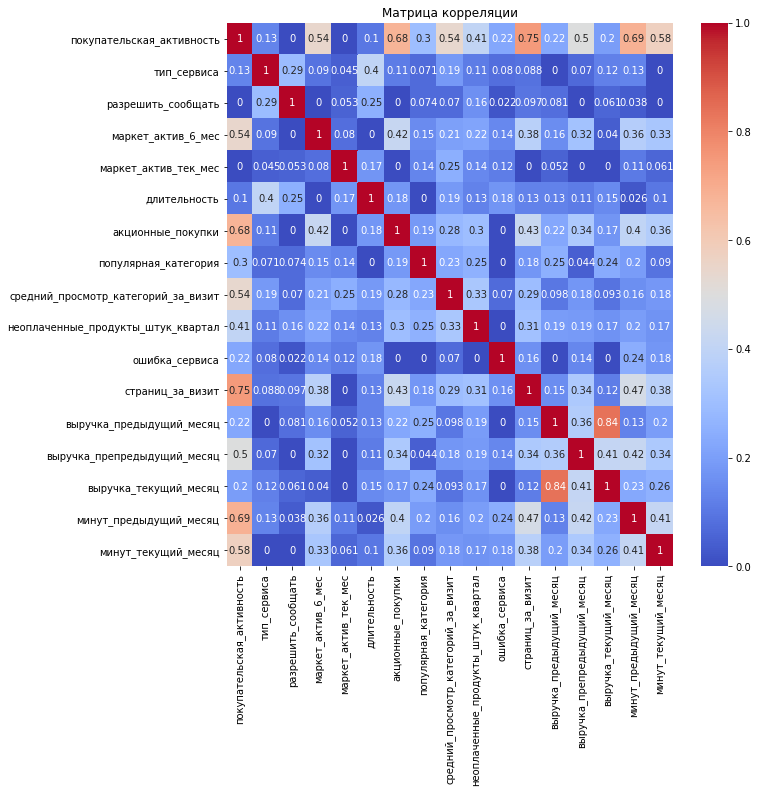

In [34]:
interval_cols = [
    'маркет_актив_6_мес', 
    'выручка_предыдущий_месяц',
    'выручка_препредыдущий_месяц',
    'выручка_текущий_месяц',
    'длительность',
    'минут_предыдущий_месяц',
    'минут_текущий_месяц'
]

# Вычисляем корреляционную матрицу с учетом только непрерывных признаков
corr_matrix1 = market_full.drop('id', axis=1).phik_matrix(interval_cols=interval_cols)

# Визуализация матрицы корреляции
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()


**Вывод**

Самые высокие значения коэффициентов корелляции наблюдаются в двух парах признаков:
- `выручка_текущий_месяц` и `выручка_предыдущий_месяц` (0.84)
- `покупательская_активность` (целевой признак) и `страниц_за_визит` (0.75)

Значения коэффициентов корреляции высокие, но не критичные. Оставим признаки как есть.

## Использование пайплайнов

Приступим к непосредственному построению модели. Мы переберем модели KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC() используя пайплайны. подходящей для модели метрикой выбрана `roc-auc`, так как она обладает некоторыми преимуществами:

- Устойчивость к несбалансированным классам
- Независимость от порога классификации
- Подходит для бинарной классификации

Подготовим данные. Закодируем целевой признак в значение 0 и 1. А так же преобразуем колонку `акционные_покупки`. Явно выделяются 2 сегмента: менее половины и более половины. Возьмем границу 0.6. Создадим бинарный признак и запишем его в столбец `акционные_покупки`.

In [35]:
market_full['акционные_покупки'] = (market_full['акционные_покупки'] > 0.6).astype(int)
market_full.head(5)

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
1,215349,Снизилась,премиум,да,4.4,4,819,1,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,1,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,1,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
5,215353,Снизилась,стандарт,да,3.3,4,762,0,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


In [36]:
market_full['покупательская_активность'].value_counts()

Прежний уровень    802
Снизилась          494
Name: покупательская_активность, dtype: int64

In [37]:
# Создаём экземпляр LabelEncoder
le = LabelEncoder()

# Перезаписываем целевой столбец, используя LabelEncoder
market_full['покупательская_активность'] = le.fit_transform(market_full['покупательская_активность'])

# Проверяем изменения
market_full['покупательская_активность'].value_counts()

0    802
1    494
Name: покупательская_активность, dtype: int64

In [38]:
market_full = market_full.set_index('id')
market_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215349 to 216647
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   покупательская_активность            1296 non-null   int64  
 1   тип_сервиса                          1296 non-null   object 
 2   разрешить_сообщать                   1296 non-null   object 
 3   маркет_актив_6_мес                   1296 non-null   float64
 4   маркет_актив_тек_мес                 1296 non-null   int64  
 5   длительность                         1296 non-null   int64  
 6   акционные_покупки                    1296 non-null   int64  
 7   популярная_категория                 1296 non-null   object 
 8   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 9   неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 10  ошибка_сервиса                       1296 non-null   int64  
 11  страниц_за_визит       

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    market_full.drop(['покупательская_активность'], axis=1),
    market_full['покупательская_активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = market_full['покупательская_активность'])

X_train.shape, X_test.shape

# создаём списки с названиями признаков
ohe_columns = ['разрешить_сообщать', 'популярная_категория']
ord_columns = ['тип_сервиса', 'акционные_покупки']
num_columns = ['маркет_актив_6_мес', 
           'маркет_актив_тек_мес', 
           'длительность',
           'средний_просмотр_категорий_за_визит',
           'неоплаченные_продукты_штук_квартал',
           'ошибка_сервиса',
           'страниц_за_визит', 
           'выручка_предыдущий_месяц',
           'выручка_препредыдущий_месяц',
           'выручка_текущий_месяц',
           'минут_предыдущий_месяц',
           'минут_текущий_месяц'] 

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
    ]
    )

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум'], 
                    [0, 1],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': [0.01, 0.1, 1, 10, 100, 1000],
        #'models__max_iter': [100, 200, 300],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },

    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE)],
        'models__C': [0.1, 1, 10, 100],  # Параметр регуляризации
        'models__kernel': ['linear', 'rbf'],  # Ядра для SVC
        'models__gamma': ['scale', 'auto'],  # Параметр для радиальной функции
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

y_test_pred_proba = randomized_search.predict_proba(X_test)[:, 1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred_proba)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                        

**Вывод**

На данном этапе выполнили:
- преобразование количественного признака `акционные_покупки` и целевого признака `покупательская_активность` в категориальный
- перевод столбца `id` в индекс
- найдена и обучена модель для определения снижения активности покупателей сервиса. Лучшие результаты показала модель LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear'). Метрика roc_auc для тестовой выборки показала результат 0.917.

## Анализ важности признаков

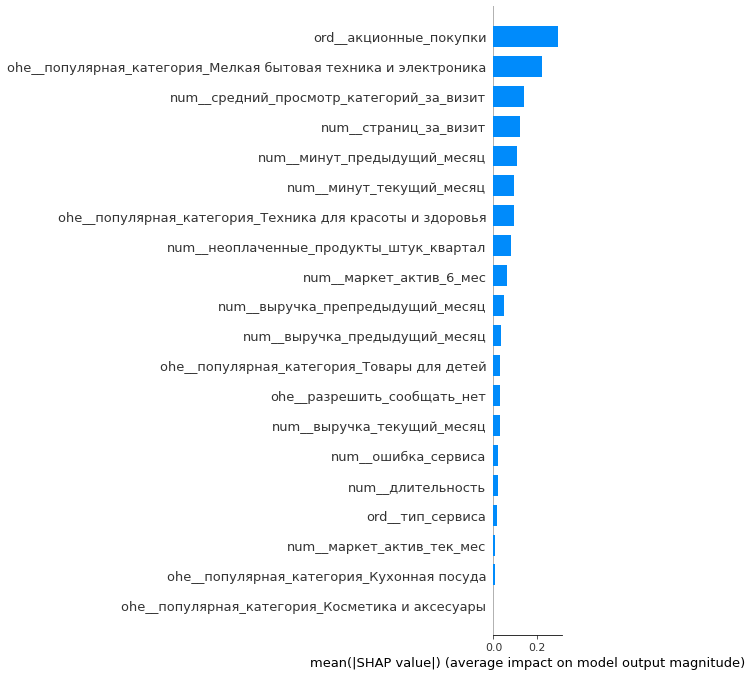

<Figure size 1800x1440 with 0 Axes>

In [40]:
# Подготовка SHAP объяснителя
X_train_2 = pipe_final.named_steps['preprocessor'].fit_transform(X_train)
explainer = shap.LinearExplainer(randomized_search.best_estimator_.named_steps['models'], X_train_2)

X_test_2 = pipe_final.named_steps['preprocessor'].transform(X_test)
feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()
X_test_2 = pd.DataFrame(X_test_2, columns=feature_names)

# Вычисление SHAP значений
shap_values = explainer(X_test_2)

# Построение графиков SHAP
shap.summary_plot(shap_values, X_test_2, plot_type="bar", max_display=30, show=False)
plt.figure(figsize=(25, 20))
plt.show()

**Вывод**

Наиболее важные признаки:
- `акционные_покупки`
- `средний_просмотр_категорий_за_визит`
- `страниц_за_визит`
- `минут_предыдущий_месяц`
- `минут_текущий_месяц`
- `маркет_актив_6_мес`

Наименее важные признаки:
- `разрешить_сообщать`
- `ошибка_сервиса`
- `длительность`
- `тип_сервиса`
- `маркет_актив_тек_мес`

Как видно из визуализаций SHAP, сильнее всего влияют на целевую переменную количественные признаки, описывающие взаимодействие пользователя с сайтом (время на сайте, количество просматриваемых категорий и страниц), а так же число рассылок, звонков, показов рекламы за 6 месяцев. Уменьшение значений этих показателей повышают вероятность снижения покупательской активности клиента.

Признаки, описывающие финансовое и продуктовое поведение клиента (категории товаров) слабо влияют на прогнозирование снижения покупателской активности. Можно сказать только то, что увеличение популярности категории `мелкая_бытовая_техника_и_электроника` склоняет модель к негативному прогнозу (0).

## Сегментация покупателей

Выполним сегментацию покупателей. Используем результаты моделирования и данные о прибыльности покупателей. Рассмотрим сегмент `акционные_покупки` более более 0.6.

In [41]:
y_test_proba = randomized_search.predict_proba(X_test)[:,1]

In [42]:
X_test['вероятность_снижения_покупательской_активности'] = y_test_proba
data = X_test.sort_values(by='вероятность_снижения_покупательской_активности')
data

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,вероятность_снижения_покупательской_активности
id,,,,,,,,,,,,,,,,,
215775,стандарт,нет,5.0,4,157,0,Мелкая бытовая техника и электроника,5,0,5,13,4028.0,4934.0,3372.8,19,16,0.003380
216624,стандарт,да,5.4,5,806,0,Домашний текстиль,6,1,8,11,5565.5,5096.0,6102.4,22,19,0.003392
216410,премиум,да,4.8,3,939,0,Домашний текстиль,6,1,7,12,4273.0,4465.0,4236.6,21,23,0.004673
216553,стандарт,да,6.1,4,298,0,Домашний текстиль,6,3,6,16,5028.5,5039.0,5149.4,19,14,0.005050
216589,стандарт,да,4.1,5,447,0,Косметика и аксесуары,6,0,9,12,5430.5,5045.0,5894.6,20,17,0.005915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215744,стандарт,да,1.7,5,439,0,Кухонная посуда,1,5,2,1,5421.5,4370.0,6016.9,6,9,0.996176
215418,стандарт,нет,1.7,4,472,1,Домашний текстиль,2,6,4,3,5943.5,4661.0,6427.1,8,11,0.996296
215668,премиум,да,4.4,4,343,1,Товары для детей,2,9,2,2,5567.5,4723.0,5293.2,6,9,0.997596


In [43]:
money = money.set_index('id')

In [44]:
data= data.merge(money, left_index=True, right_index=True, how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 215775 to 215538
Data columns (total 18 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   тип_сервиса                                     324 non-null    object 
 1   разрешить_сообщать                              324 non-null    object 
 2   маркет_актив_6_мес                              324 non-null    float64
 3   маркет_актив_тек_мес                            324 non-null    int64  
 4   длительность                                    324 non-null    int64  
 5   акционные_покупки                               324 non-null    int64  
 6   популярная_категория                            324 non-null    object 
 7   средний_просмотр_категорий_за_визит             324 non-null    int64  
 8   неоплаченные_продукты_штук_квартал              324 non-null    int64  
 9   ошибка_сервиса                     

In [45]:
num_data = ['маркет_актив_6_мес', 
            'маркет_актив_тек_мес', 
            'длительность',  
            'средний_просмотр_категорий_за_визит', 
            'неоплаченные_продукты_штук_квартал', 
            'ошибка_сервиса', 
            'страниц_за_визит', 
            'выручка_предыдущий_месяц', 
            'выручка_препредыдущий_месяц',
            'выручка_текущий_месяц',
            'минут_текущий_месяц', 
            'минут_предыдущий_месяц',
            'прибыль']

In [46]:
def plot_scatter_plots(data, num_data, hue):
    plt.figure(figsize=(20, 50))
    for i, feature in enumerate(num_data, 1):
        plt.subplot(8, 2, i)
        sns.scatterplot(data=data, x='вероятность_снижения_покупательской_активности', y=feature, hue=hue, alpha=0.3)
        plt.title(f'Связь вероятности с {feature}')

    plt.suptitle(f'Диаграммы рассеяния для признаков "вероятность_снижения_покупательской_активности" и "{hue}"', fontsize=25, y=1.01)
    plt.tight_layout()
    plt.show()

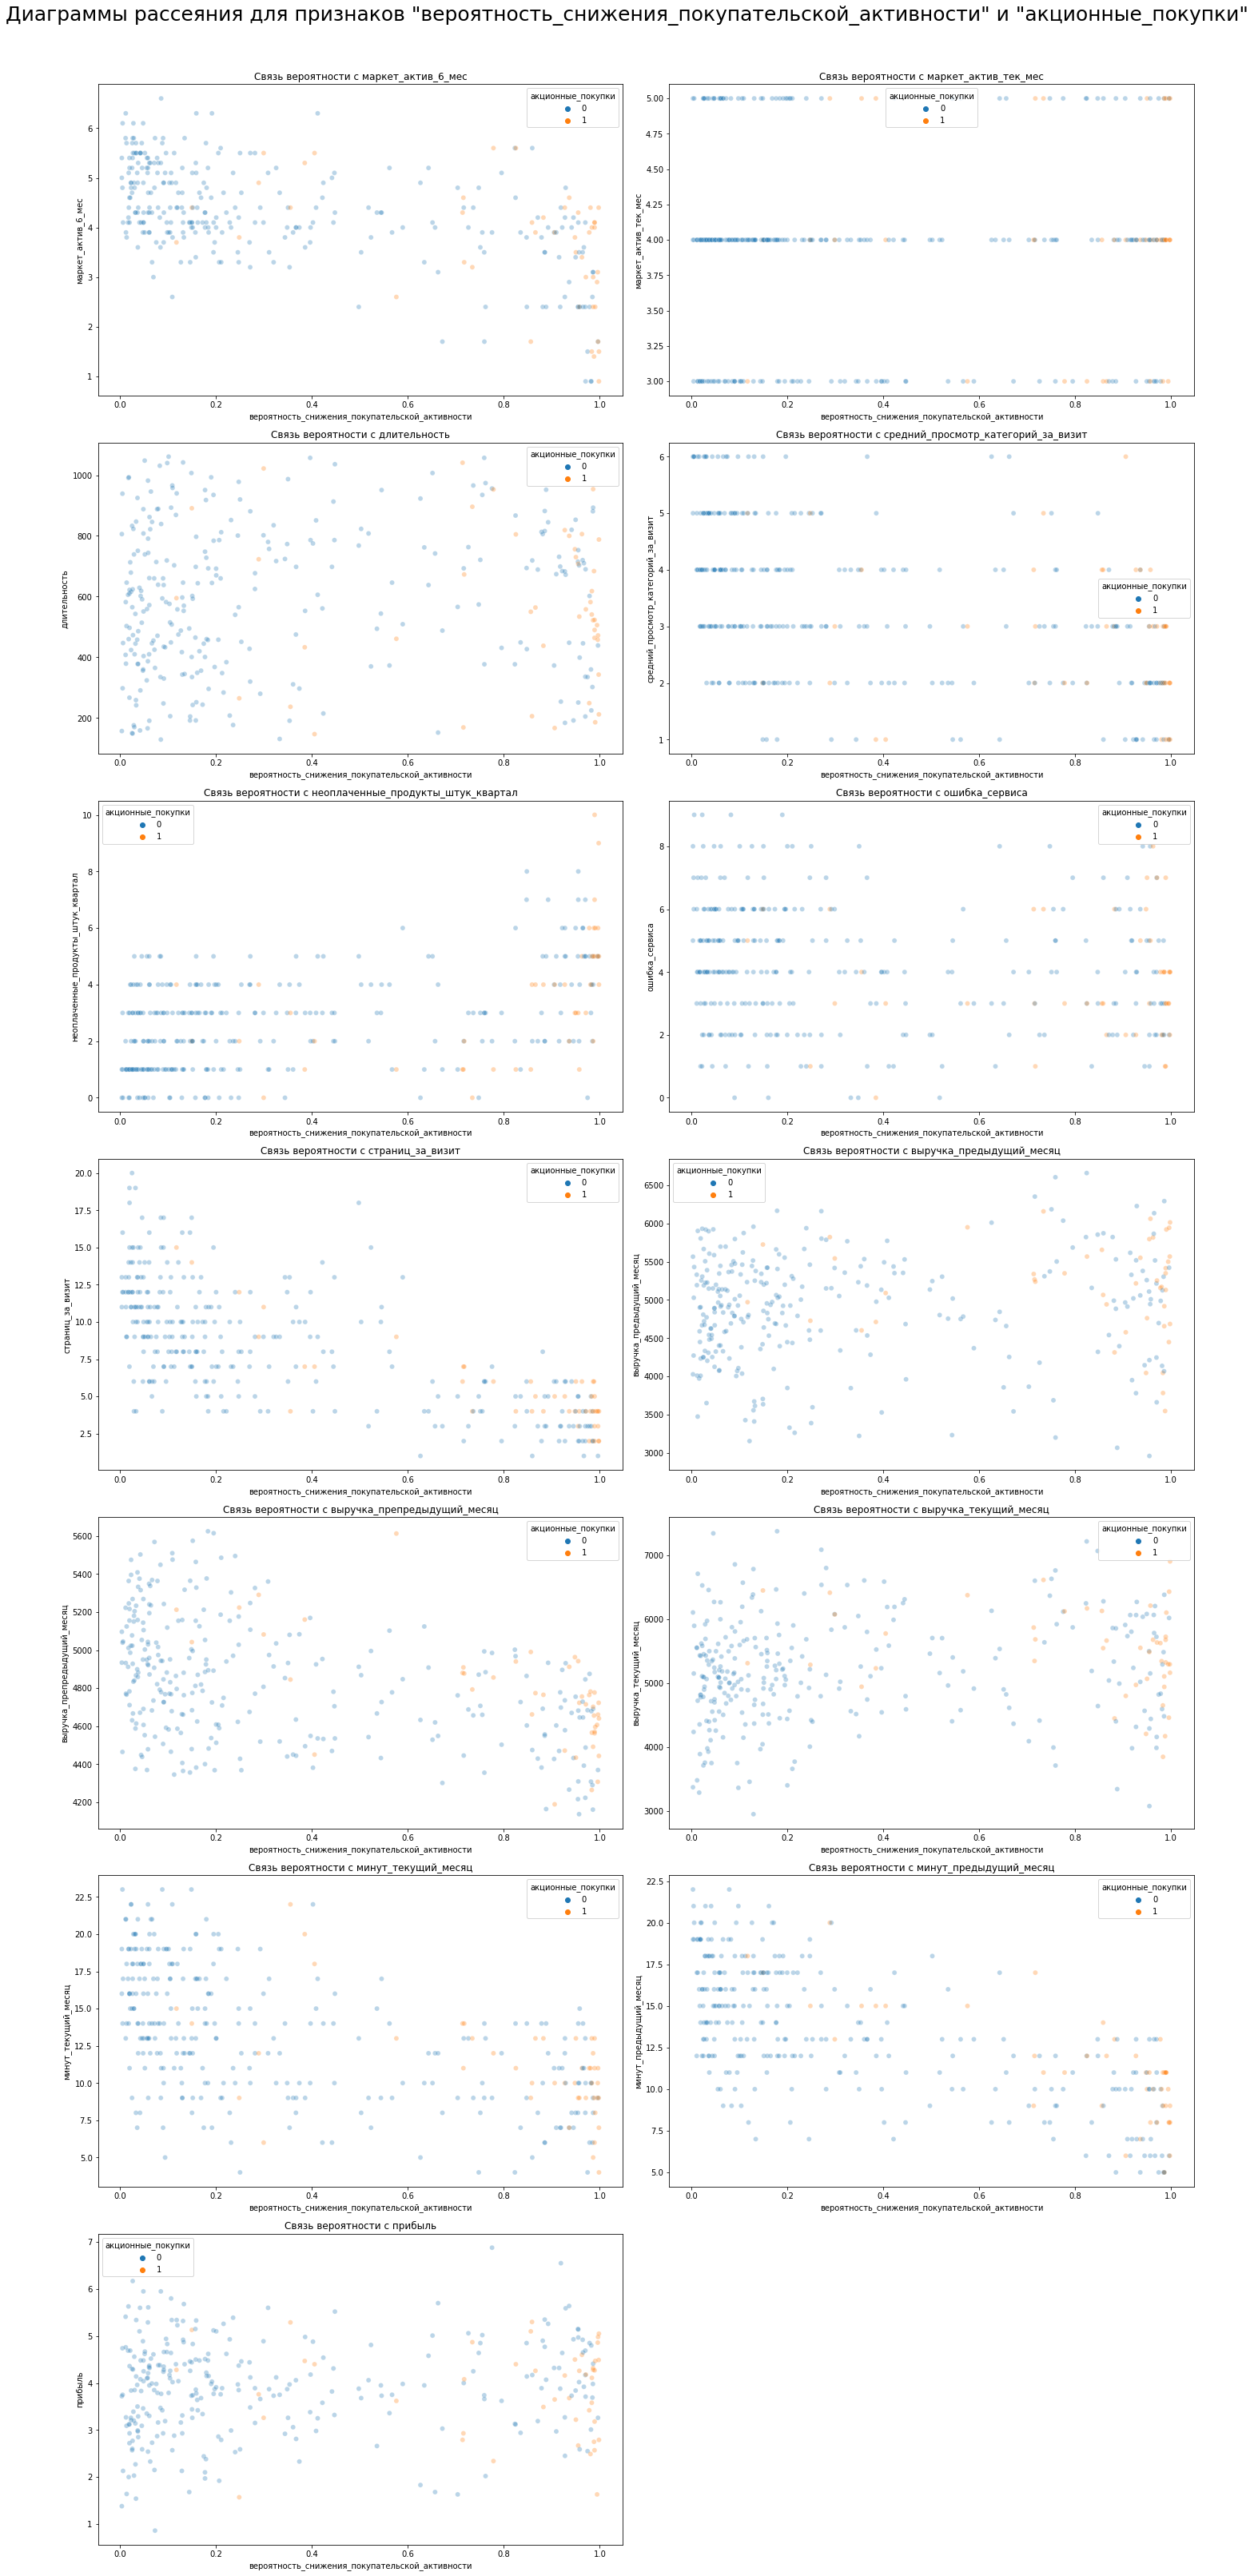

In [47]:
plot_scatter_plots(data, num_data, hue='акционные_покупки')

На основании приведенных графиков можно выделить следующие пороги значений признака для разделения покупателей на классы. В частности, покупатели со сниженной активностью имеют значения признака:

- `маркет_актив_6_мес` менее 5,  
- `средний_просмотр_категорий_за_визит` менее 4, 
- `неоплаченные_продукты_штук_квартал` более 5, 
- `страниц_за_визит` менее 7,
- `выручка_препредыдущий_месяц` менее 5000,
- `минут_текущий_месяц` менее 15, 
- `минут_предыдущий_месяц` менее 15,
- `прибыль` от 2 до 5
- `акционные_покупки` более 0.6

В выбранном сегменте `акционные_покупки` более более 0.6 покупатели меньше времени проводят на сайте, имеют больше неоплаченных товаров в корзине, меньше смотрят категорий и страниц, а так же на них приходится меньшее количество маркетинговых коммуникаций. Посмотрим как распределены категориальные значения в группах.

Рассмотрим взаимосвязь выручки по месяцам и акционных покупок.

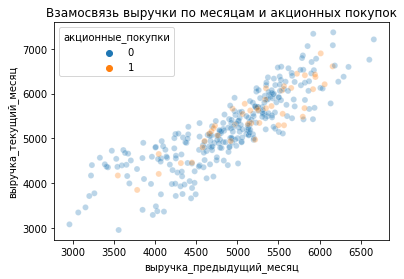

In [48]:
sns.scatterplot(data=data, x='выручка_предыдущий_месяц', y='выручка_текущий_месяц', hue='акционные_покупки', alpha=0.3)

# Добавляем заголовок
plt.title('Взамосвязь выручки по месяцам и акционных покупок')
plt.xlabel('выручка_предыдущий_месяц')
plt.ylabel('выручка_текущий_месяц')

# Отображаем график
plt.show()

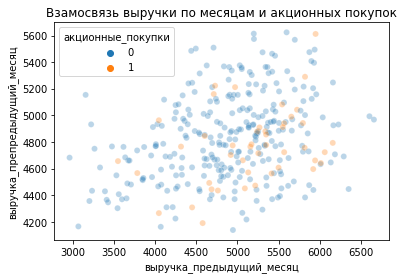

In [49]:
sns.scatterplot(data=data, x='выручка_предыдущий_месяц', y='выручка_препредыдущий_месяц', hue='акционные_покупки', alpha=0.3)

# Добавляем заголовок
plt.title('Взамосвязь выручки по месяцам и акционных покупок')
plt.xlabel('выручка_предыдущий_месяц')
plt.ylabel('выручка_препредыдущий_месяц')

# Отображаем график
plt.show()

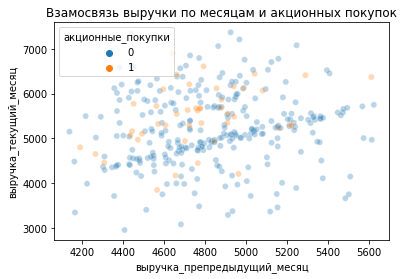

In [50]:
sns.scatterplot(data=data, x='выручка_препредыдущий_месяц', y='выручка_текущий_месяц', hue='акционные_покупки', alpha=0.3)

# Добавляем заголовок
plt.title('Взамосвязь выручки по месяцам и акционных покупок')
plt.xlabel('выручка_препредыдущий_месяц')
plt.ylabel('выручка_текущий_месяц')

# Отображаем график
plt.show()

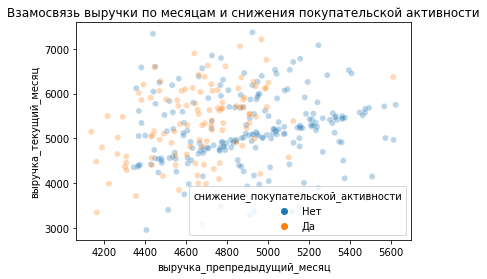

In [51]:
# Создаем новую категорию на основе границы 0.5
data['снижение_покупательской_активности'] = np.where(data['вероятность_снижения_покупательской_активности'] > 0.5, 'Да', 'Нет')
sns.scatterplot(data=data, x='выручка_препредыдущий_месяц', y='выручка_текущий_месяц', hue='снижение_покупательской_активности', alpha=0.3)

# Добавляем заголовок
plt.title('Взамосвязь выручки по месяцам и снижения покупательской активности')
plt.xlabel('выручка_препредыдущий_месяц')
plt.ylabel('выручка_текущий_месяц')

# Отображаем график
plt.show()

В диаграмме связи `выручка_препредыдущий_месяц` и `выручка_текущий_месяц` выделяется часть стабильных покупателей, среди них нет совершающий акционные покупки белее 0.6. Акционные покупки чаще совершаются покупателями с высокой `выручка_текущий_месяц`, эти же покупатели имеют высокую вероятность снижения покупательской активности.

Рассмотрим детальнее сегмент покупателей приносящих прибыль более 4.

In [52]:
data_profit = data.query('прибыль > 4')

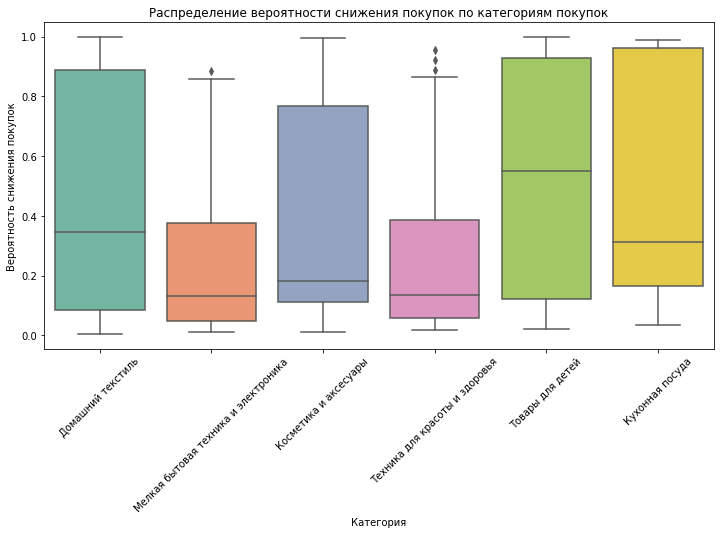

In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_profit, x='популярная_категория', y='вероятность_снижения_покупательской_активности', palette='Set2')
plt.title('Распределение вероятности снижения покупок по категориям покупок')
plt.xlabel('Категория')
plt.ylabel('Вероятность снижения покупок')
plt.xticks(rotation=45)
plt.show()

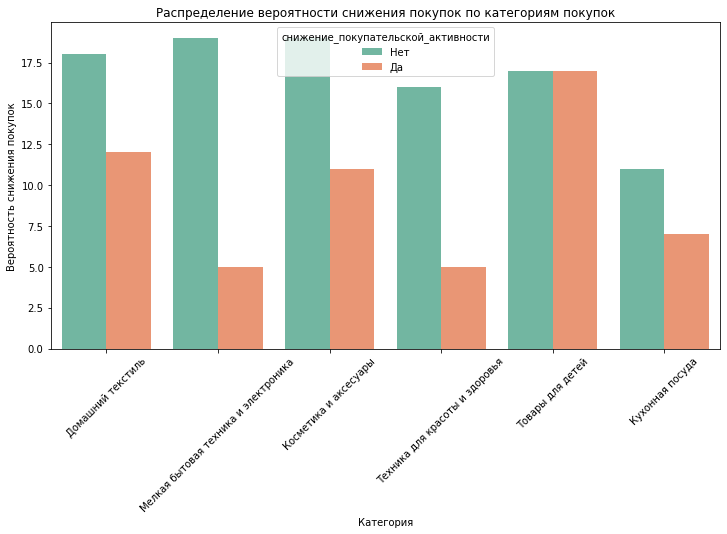

In [54]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data_profit, x='популярная_категория', hue='снижение_покупательской_активности', palette='Set2')  # Добавляем доверительный интервал (standard deviation)
plt.title('Распределение вероятности снижения покупок по категориям покупок')
plt.xlabel('Категория')
plt.ylabel('Вероятность снижения покупок')
plt.xticks(rotation=45)  # Повернуть метки на оси X для лучшей читаемости
plt.legend(title='снижение_покупательской_активности')  # Добавим легенду для состояния
plt.show()

Спеди покупателей с популярной категорией "Товары для детей" наблюдается самая высокая вероятность снижения покупательской активност. Россмотрим распределение параметров по категориям товарров.

In [55]:
def plot_activity_distribution(data, activity_column):
    categories = data['популярная_категория'].unique()
    plt.figure(figsize=(15, 10))
    
    for i, category in enumerate(categories):
        plt.subplot(3, 2, i + 1)
        sns.histplot(data[data['популярная_категория'] == category][activity_column], bins=5, kde=True)
        plt.title(f'{activity_column}: {category}')
        plt.xlabel(f'{activity_column}')
        plt.ylabel('Частота')

    plt.tight_layout()
    plt.show()

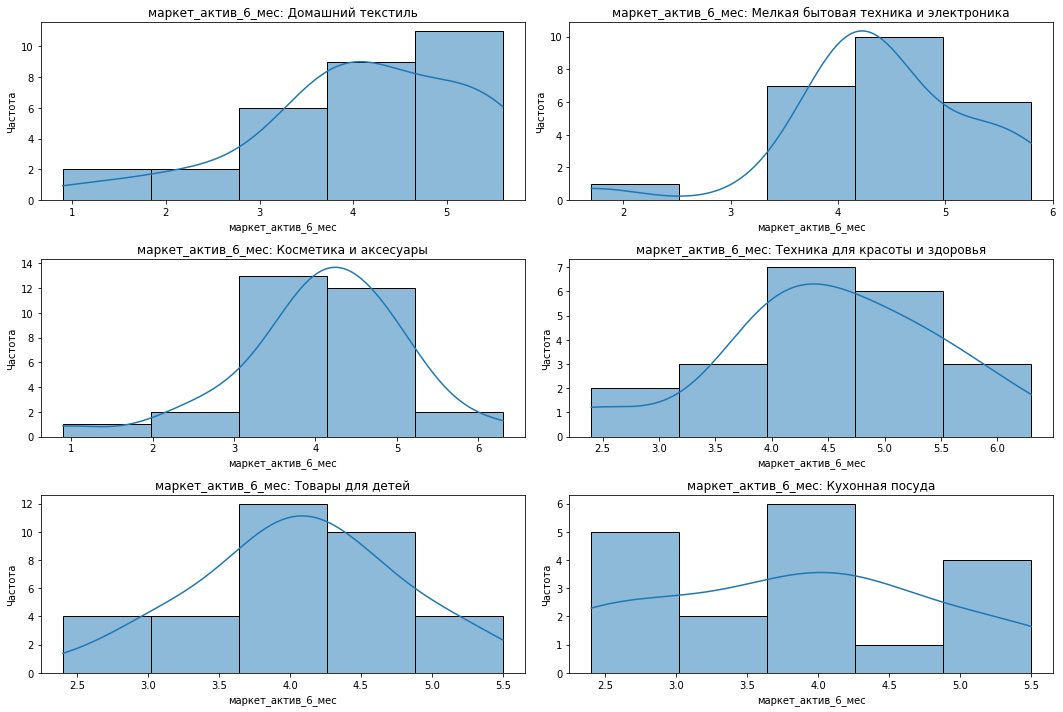

In [56]:
plot_activity_distribution(data_profit, 'маркет_актив_6_мес')

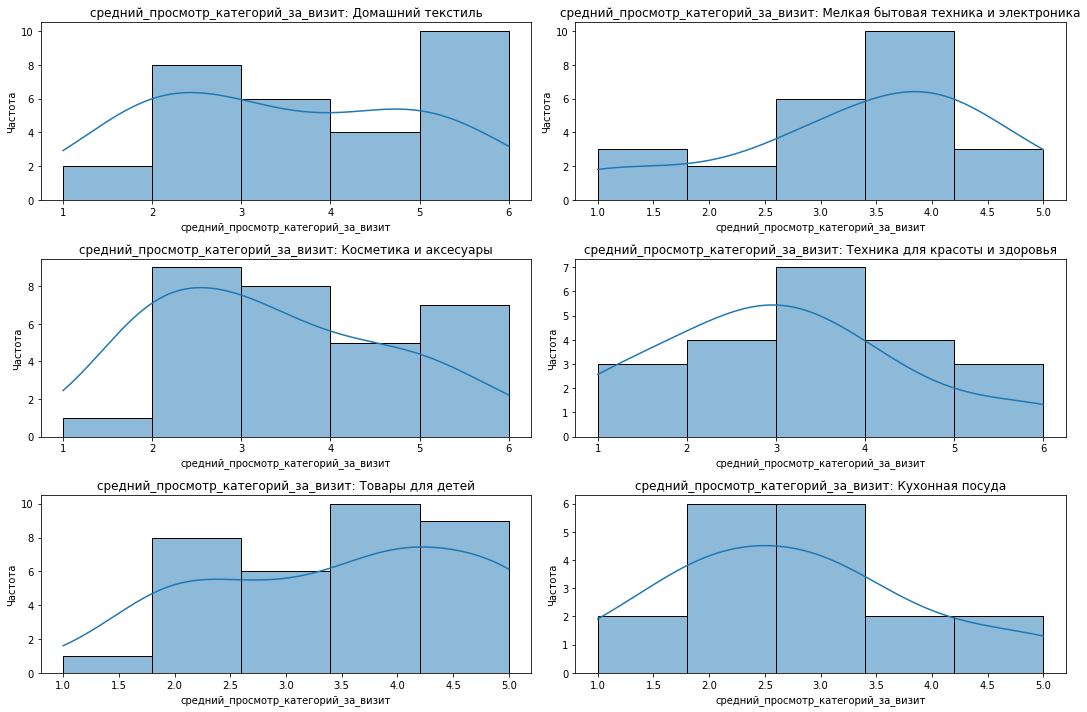

In [57]:
plot_activity_distribution(data_profit, 'средний_просмотр_категорий_за_визит')

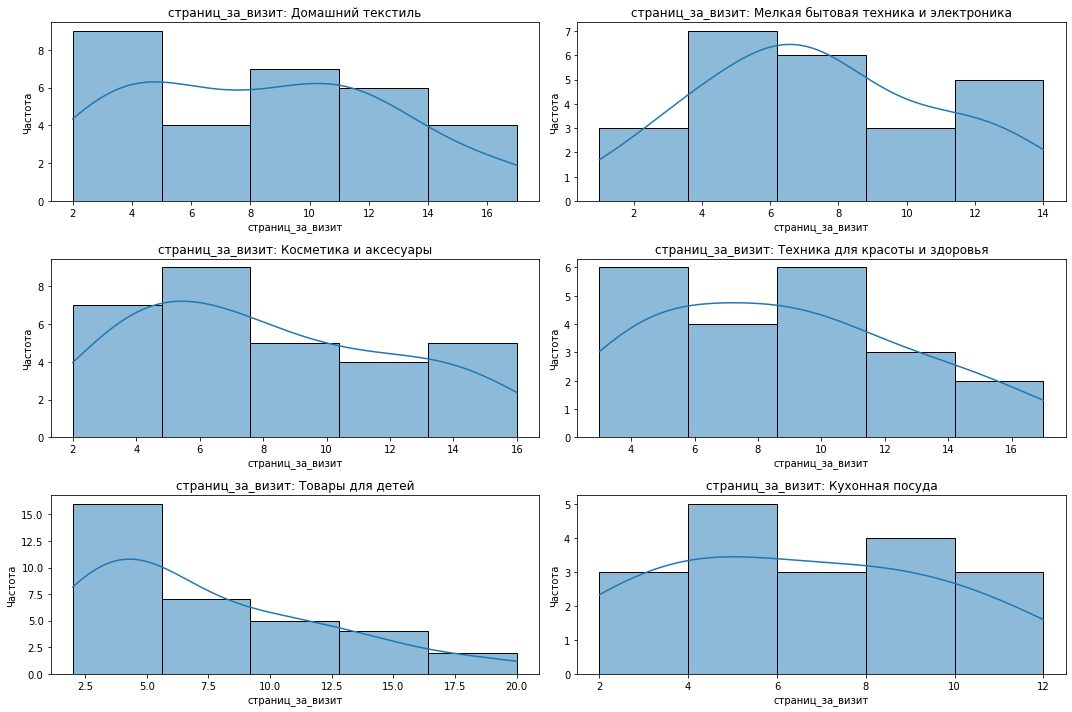

In [58]:
plot_activity_distribution(data_profit, 'страниц_за_визит')

Среди покупателей с популярной категорией "Товары для детей" наблюдается высокий интерес с просмотру разных категорий товаров, но малое число просмотров страниц за визит, т.е. магазину не удается задержать внимание данного сегмента покупателей. 

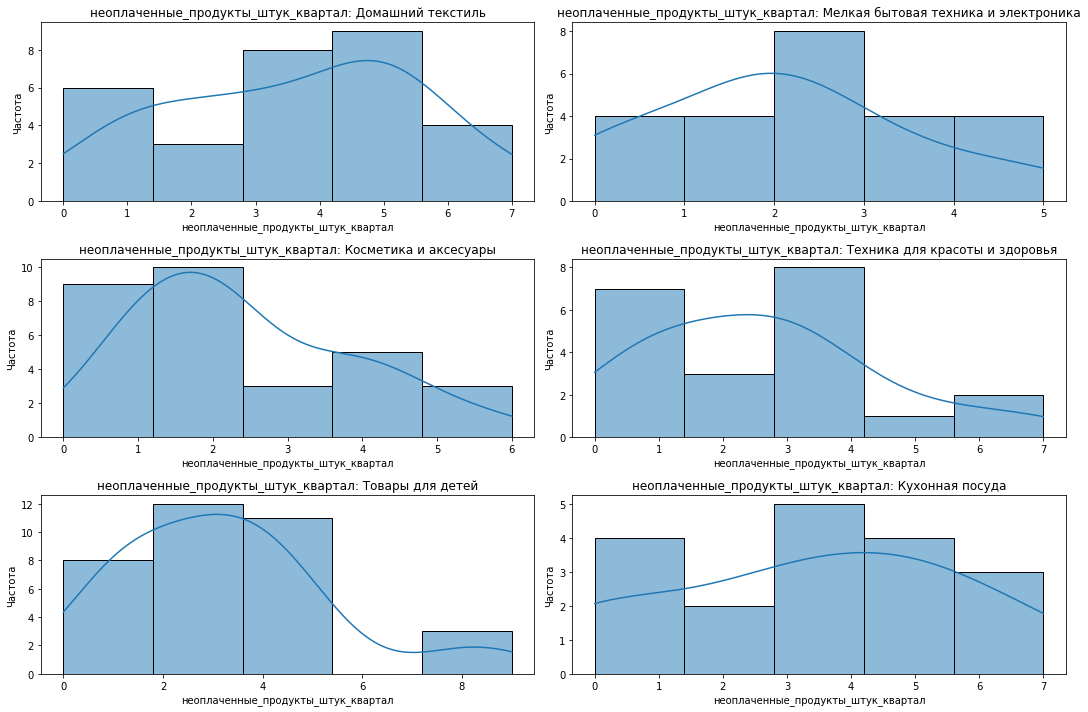

In [59]:
plot_activity_distribution(data_profit, 'неоплаченные_продукты_штук_квартал')

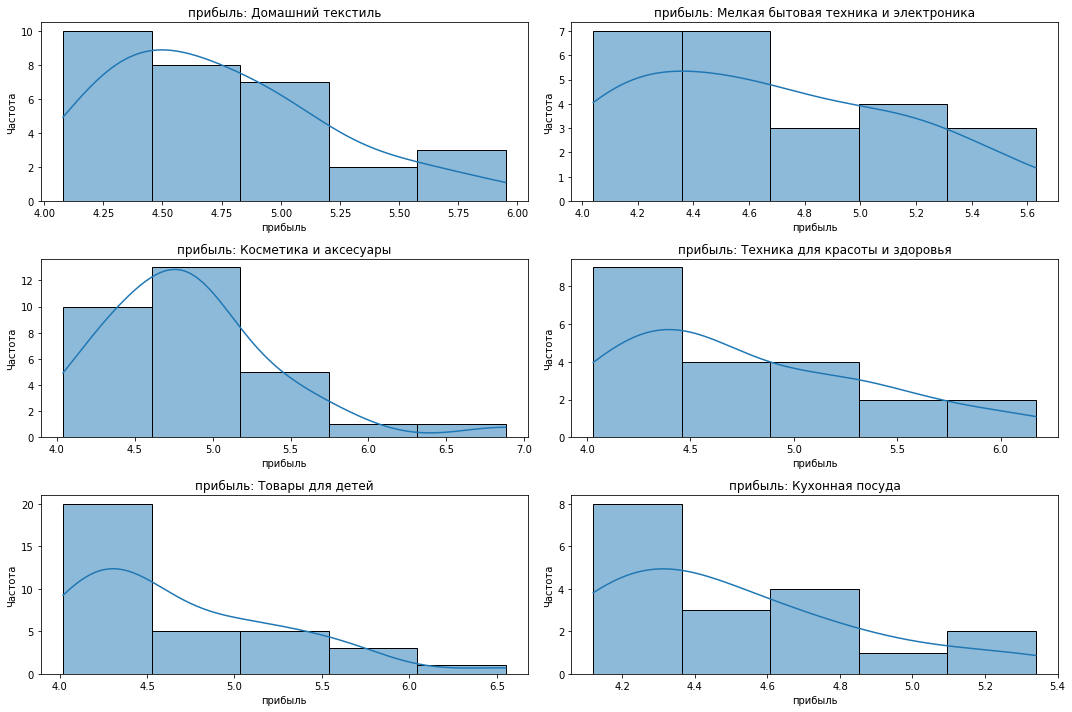

In [60]:
plot_activity_distribution(data_profit, 'прибыль')

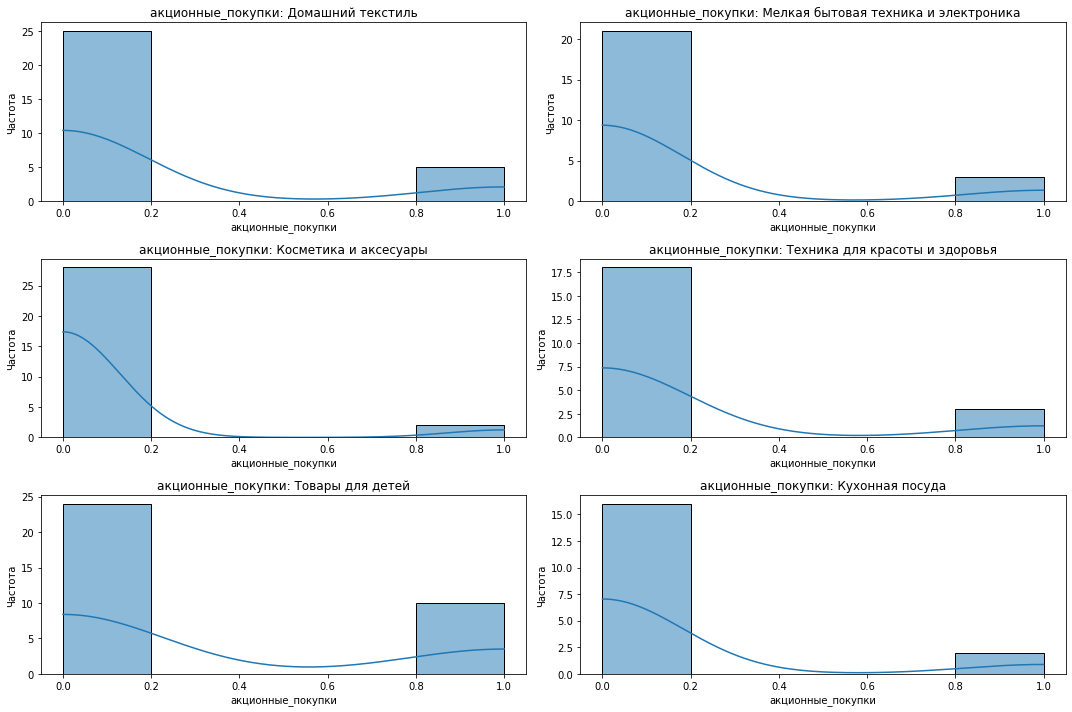

In [61]:
plot_activity_distribution(data_profit, 'акционные_покупки')

In [62]:
data_profit

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,вероятность_снижения_покупательской_активности,прибыль,снижение_покупательской_активности
id,,,,,,,,,,,,,,,,,,,
216410,премиум,да,4.8,3,939,0,Домашний текстиль,6,1,7,12,4273.0,4465.0,4236.6,21,23,0.004673,4.74,Нет
215862,стандарт,да,5.8,4,408,0,Мелкая бытовая техника и электроника,4,2,3,12,5330.0,5222.0,5553.6,12,21,0.011219,5.41,Нет
215838,стандарт,нет,6.3,4,582,0,Косметика и аксесуары,5,1,6,13,5193.0,4932.0,5549.2,17,13,0.011536,4.76,Нет
216161,стандарт,да,4.1,4,606,0,Техника для красоты и здоровья,6,1,4,12,3973.0,4912.0,3289.2,16,17,0.016373,4.69,Нет
216642,премиум,да,4.2,3,991,0,Мелкая бытовая техника и электроника,4,3,5,12,4589.5,5011.0,4354.2,19,19,0.017197,5.63,Нет
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215472,стандарт,нет,2.4,4,186,1,Косметика и аксесуары,3,6,3,4,5920.5,4596.0,6099.9,11,8,0.990407,4.47,Да
215604,стандарт,нет,3.1,5,458,1,Косметика и аксесуары,1,5,3,4,4449.0,4308.0,4459.4,8,10,0.995727,4.86,Да
215418,стандарт,нет,1.7,4,472,1,Домашний текстиль,2,6,4,3,5943.5,4661.0,6427.1,8,11,0.996296,4.98,Да


Среди покупателей с популярной категорией "Товары для детей" наибольший интерес к акционным товарам.

Покупатели, у которых категория `Товары для детей` и у которых снизилась покупательская активность, в основном покупают по акции, практически не рассматривают другие категори за визит, просматривают мало страниц и проводят меньше времени на сайте, чем покупатели, у которых активность осталась на прежнем уровне. С точки зрения выручки по месяцам, то 2 месяца назад с покупателей со сниженной активностью выручка была меньше, чем с покупателей с прежним уровнем. 

**Вывод**

**Сегмент покупателей с большой долей акционных товаров**

В этом сегменте наблюдается снижение покупательской активности. В выбранном сегменте акционные_покупки более более 0.6 покупатели меньше времени проводят на сайте, имеют больше неоплаченных товаров в корзине, меньше смотрят категорий и страниц, а так же на них приходится меньшее количество маркетинговых коммуникаций. 

- Стоит увеличить маркетинговые коммуникации компании, предлагать им акционные товары и проводить рекламные кампании.

**Сегмент покупателей с популярной категорией "Товары для детей"**

В этом сегменте также наблюдается значительное снижение покупательской активности. Данный сегмент в основном покупают по акции, просматривают мало страниц и проводят меньше времени на сайте, чем покупатели, у которых активность осталась на прежнем уровне. Но данный сегмент покупателей проявляет высокий интерес к просмотру разных категорий товаров. 

- Стоит увеличить ассортимент акционных товаров или систему рекомендаций товаров для увеличения количества просмотров страниц.


## Общий вывод

**Задача исследования**

Целью исследования было разработать решение для персонализации предложений постоянным клиентам, чтобы увеличить их покупательскую активность. Для анализа были предоставлены следующие данные:

- **market_file.csv** — данные о поведении покупателя на сайте, коммуникациях с ним и его продуктовом поведении.
- **market_money.csv** — данные о выручке, получаемой магазином от покупателя за период взаимодействия.
- **market_time.csv** — данные о времени, проведенном покупателем на сайте в течение периода.
- **money.csv** — данные о среднемесячной прибыли покупателя за последние три месяца.

**Предобработка данных**

1. Произведено изменение названий столбцов:
+ перевод в строчный формат
+ замена пробелов на подчеркивание
2. В `market_file` 
+ в колонке `тип_сервиса` данные `стандартт` заменены на `стандарт`
3. В `market_money`
+ в колонке `период`данные `препредыдущий_месяц` заменены на `предыдущий_месяц`
4. В `market_time`
+ в колонке `период` данные `предыдцщий_месяц` заменены на `предыдущий_месяц`

**Анализ данных и подготовка**

- Проведен исследовательский анализ данных.
- Проведена подготовка и объединение таблиц.
- Для поиска лучшей модели был проведен корреляционный анализ данных для исключения мультиколлинеарности.
- Подготовлены пайплайны для отбора лучшей модели в ручном и автоматическом режиме.

**Лучшая модель**

Наилучшей моделью была определена LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear'). Метрика roc_auc для тестовой выборки показала результат 0.917.

**Важные и малозначимые признаки**

Наиболее значимые признаки, на которые следует обратить внимание для увеличения покупательской активности (по убыванию значимости):

- `акционные_покупки`
- `средний_просмотр_категорий_за_визит`
- `страниц_за_визит`
- `минут_предыдущий_месяц`
- `минут_текущий_месяц`
- `маркет_актив_6_мес`

Наименее важные признаки:

- `разрешить_сообщать`
- `ошибка_сервиса`
- `длительность`
- `тип_сервиса`
- `маркет_актив_тек_мес`

Cильнее всего влияют на целевую переменную количественные признаки, описывающие взаимодействие пользователя с сайтом (время на сайте, количество просматриваемых категорий и страниц), а так же число рассылок, звонков, показов рекламы за 6 месяцев. Уменьшение значений этих показателей повышают вероятность снижения покупательской активности клиента.

Признаки, описывающие финансовое и продуктовое поведение клиента (категории товаров) слабо влияют на прогнозирование снижения покупателской активности. Можно сказать только то, что увеличение популярности категории `мелкая_бытовая_техника_и_электроника` склоняет модель к негативному прогнозу (0).


**Сегменты покупателей и рекомендации**

**Сегмент покупателей с большой долей акционных товаров**

В этом сегменте наблюдается снижение покупательской активности. В выбранном сегменте акционные_покупки более более 0.6 покупатели меньше времени проводят на сайте, имеют больше неоплаченных товаров в корзине, меньше смотрят категорий и страниц, а так же на них приходится меньшее количество маркетинговых коммуникаций. 

- Стоит увеличить маркетинговые коммуникации компании, предлагать им акционные товары и проводить рекламные кампании.

**Сегмент покупателей с популярной категорией "Товары для детей"**

В этом сегменте также наблюдается значительное снижение покупательской активности. Данный сегмент в основном покупают по акции, просматривают мало страниц и проводят меньше времени на сайте, чем покупатели, у которых активность осталась на прежнем уровне. Но данный сегмент покупателей проявляет высокий интерес к просмотру разных категорий товаров. 

- Стоит увеличить ассортимент акционных товаров или систему рекомендаций товаров для увеличения количества просмотров страниц.